In [1]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces

In [2]:
data = fetch_olivetti_faces()
data, label = data["data"], data["target"]
data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /users/Etu3/28600693/scikit_learn_data


(400, 4096)

In [5]:
Encodage = [Linear(4096, 2048), TanH(), Linear(2048, 1024), TanH()]
Decodage = [Linear(1024, 2048), TanH(), Linear(2048, 4096), Sigmoid()]

bce_loss = BCELoss()
net = Sequential(Encodage + Decodage)

Lerror, Lscore = SGD(net, bce_loss, data, data, eps=1e-3, max_iter= 100, batch_size= 10)

Iteration: 0 / 100
cost  0.667
Iteration: 1 / 100
cost  0.665
Iteration: 2 / 100
cost  0.665
Iteration: 3 / 100
cost  0.659
Iteration: 4 / 100
cost  0.658
Iteration: 5 / 100
cost  0.662
Iteration: 6 / 100
cost  0.655
Iteration: 7 / 100
cost  0.652
Iteration: 8 / 100
cost  0.651
Iteration: 9 / 100
cost  0.651
Iteration: 10 / 100
cost  0.65
Iteration: 11 / 100
cost  0.649
Iteration: 12 / 100
cost  0.647
Iteration: 13 / 100
cost  0.652
Iteration: 14 / 100
cost  0.647
Iteration: 15 / 100
cost  0.65
Iteration: 16 / 100
cost  0.646
Iteration: 17 / 100
cost  0.649
Iteration: 18 / 100
cost  0.648
Iteration: 19 / 100
cost  0.647
Iteration: 20 / 100
cost  0.644
Iteration: 21 / 100
cost  0.644
Iteration: 22 / 100
cost  0.644
Iteration: 23 / 100
cost  0.645
Iteration: 24 / 100
cost  0.644
Iteration: 25 / 100
cost  0.648
Iteration: 26 / 100
cost  0.643
Iteration: 27 / 100
cost  0.643
Iteration: 28 / 100
cost  0.642
Iteration: 29 / 100
cost  0.642
Iteration: 30 / 100
cost  0.641
Iteration: 31 / 100


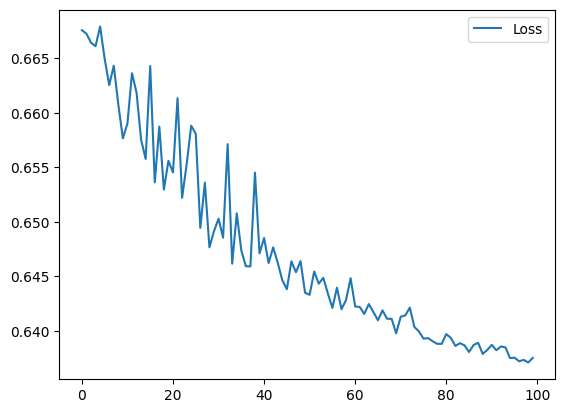

In [14]:
plt.plot(Lerror, label="Loss")
plt.legend()
plt.show()

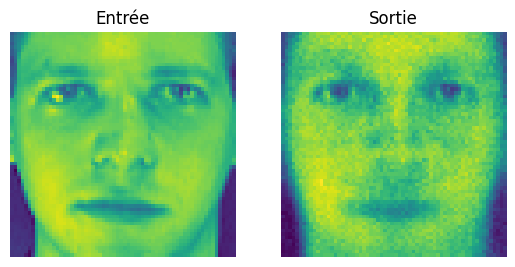

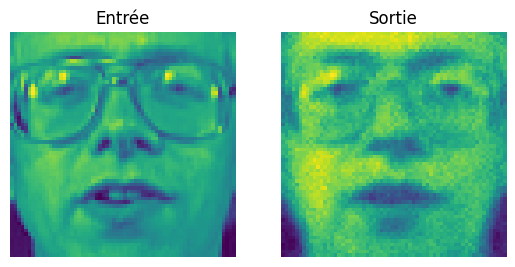

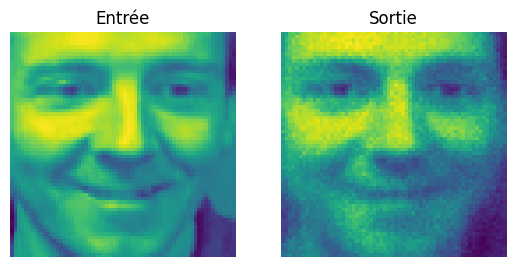

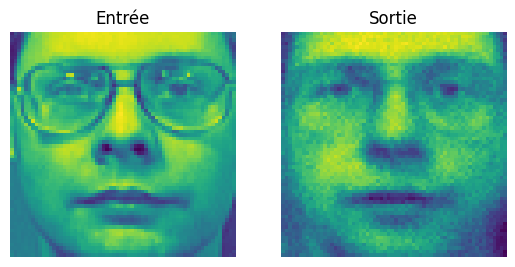

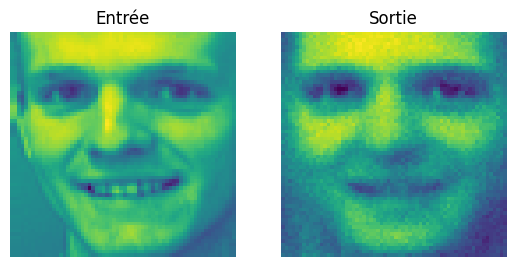

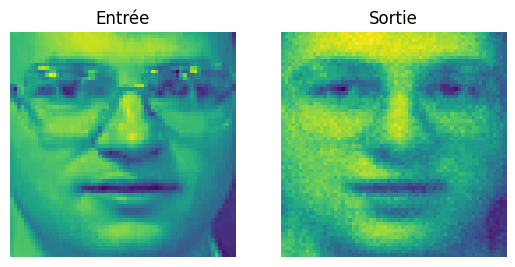

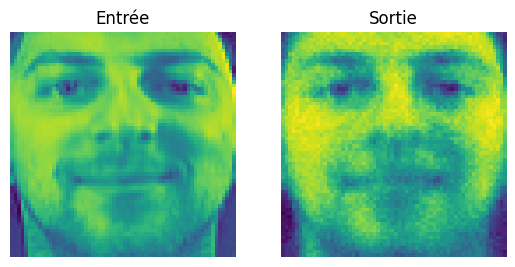

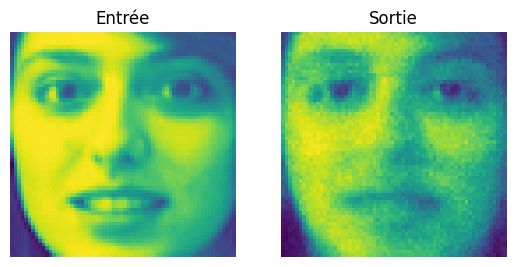

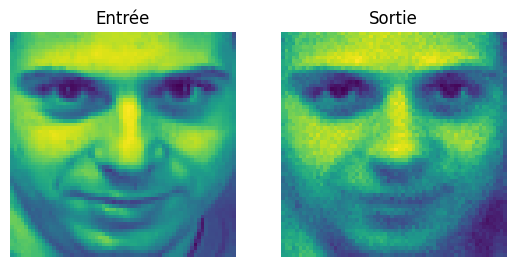

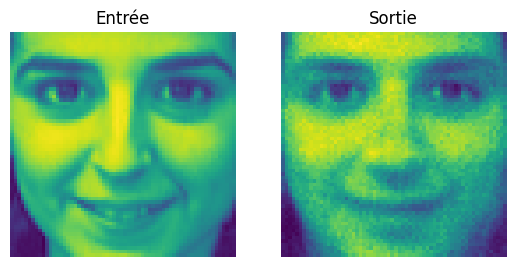

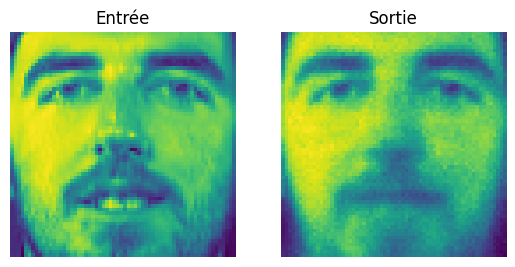

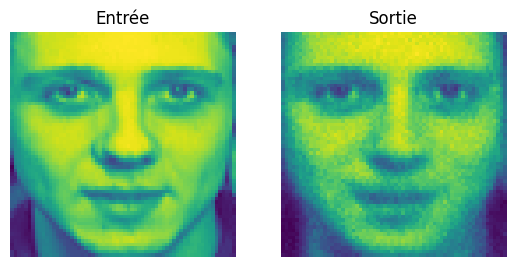

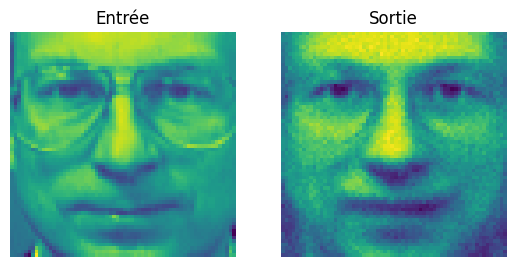

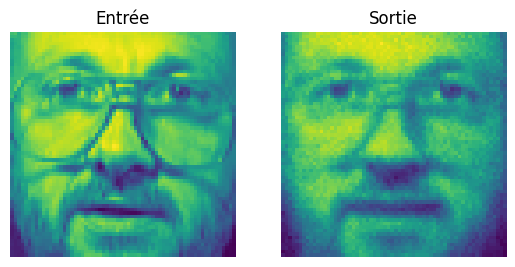

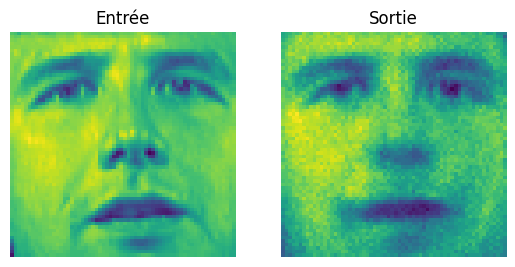

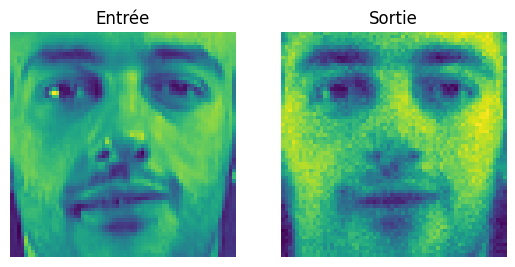

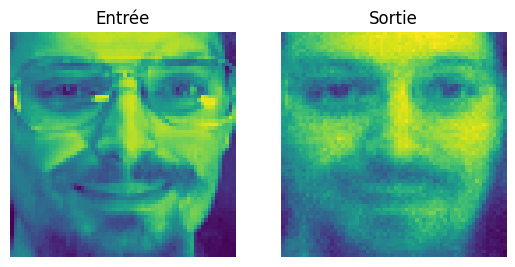

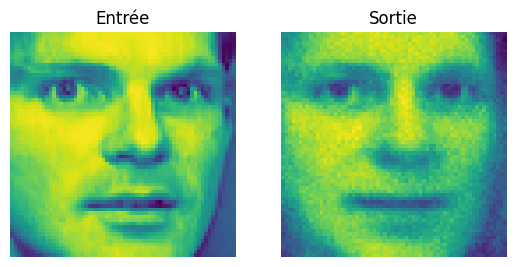

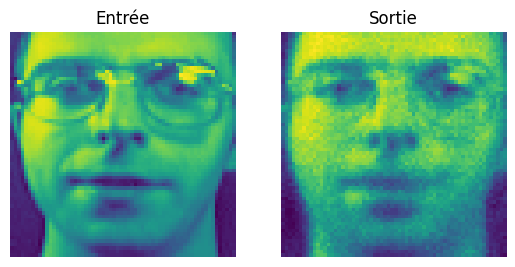

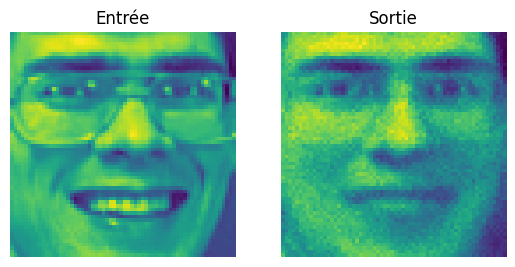

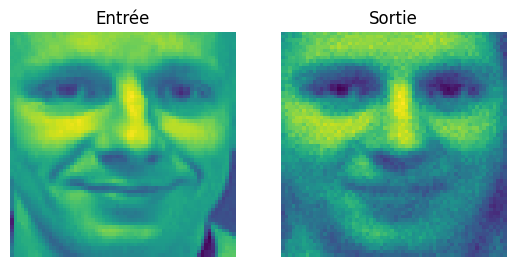

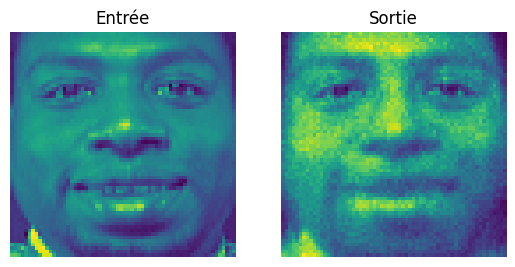

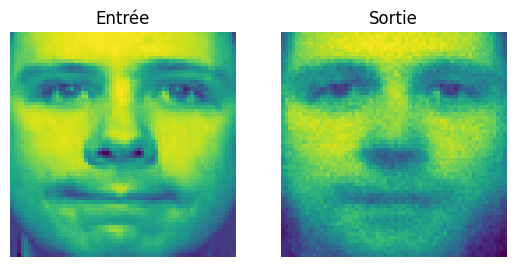

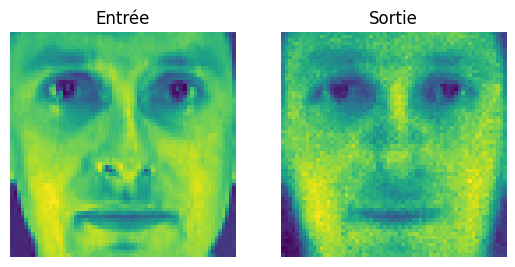

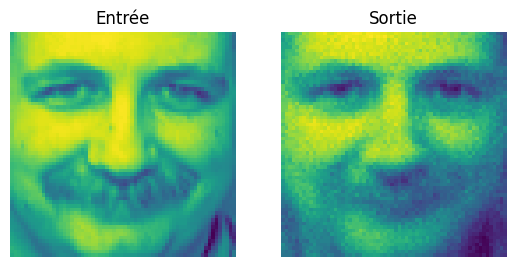

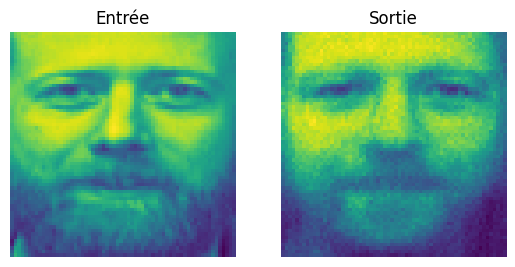

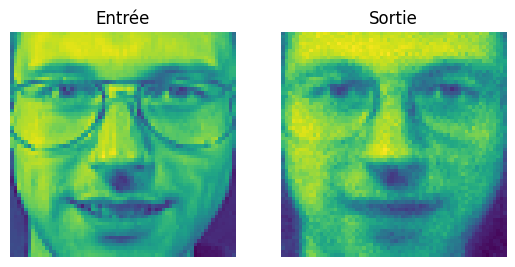

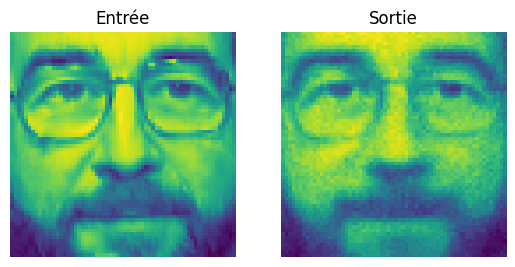

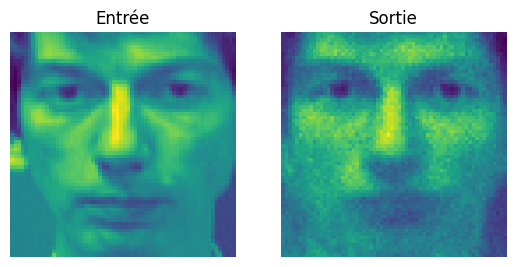

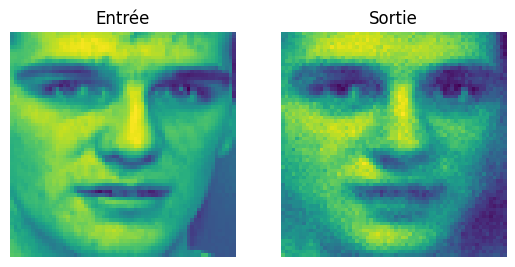

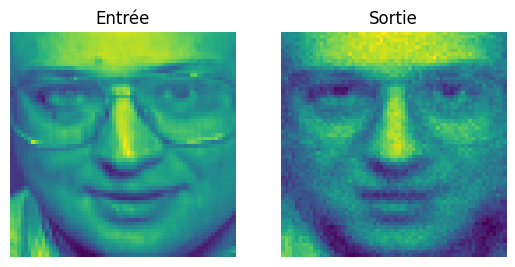

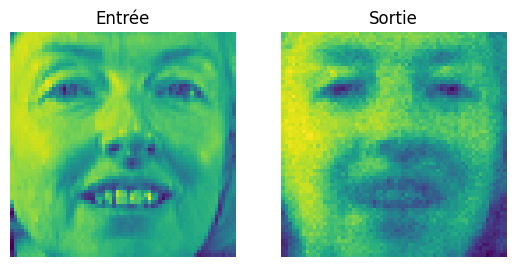

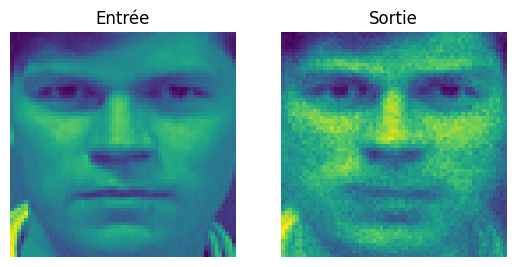

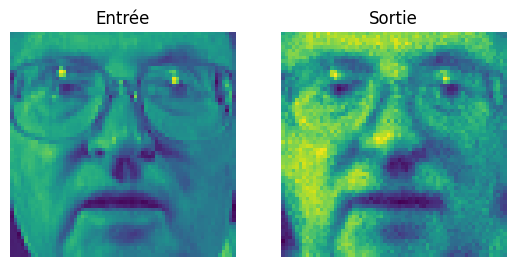

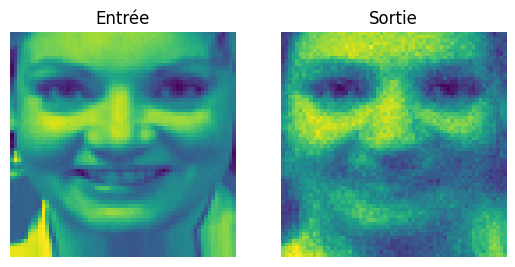

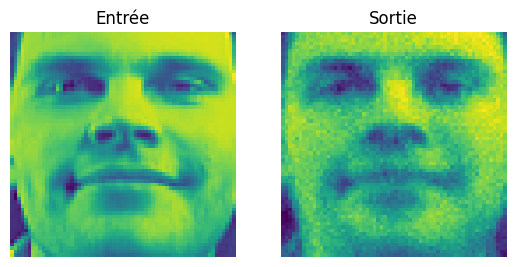

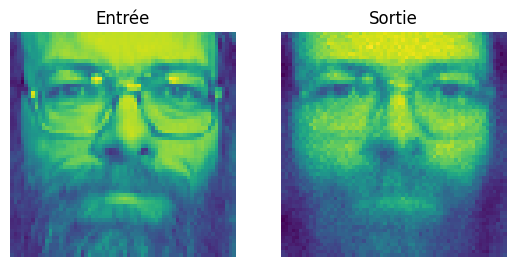

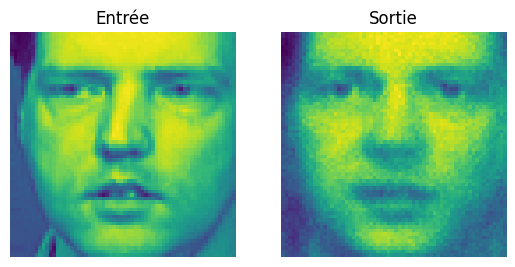

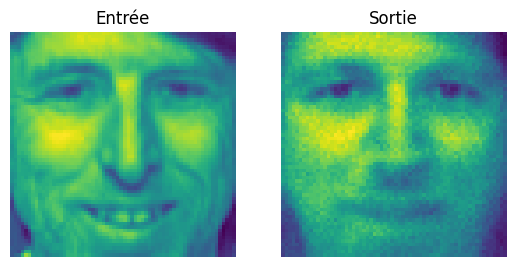

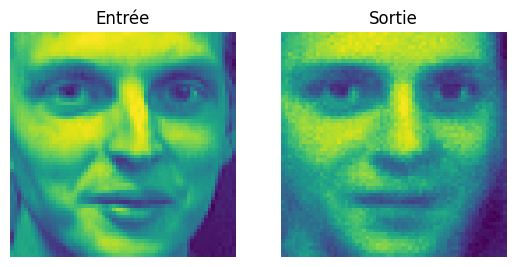

In [6]:
for i in range(40):
    plt.subplot(121)
    plt.title("Entrée")

    entree = np.array(data[label == i,:][0])
    plt.imshow(entree.reshape(64,64))
    plt.axis('off')

    plt.subplot(122)
    plt.title("Sortie")
    out = net.forward(entree.reshape(1,entree.shape[0]))
    plt.imshow(out.reshape(64,64))
    plt.axis('off')
    plt.show()

## test avec un reseau plus profond

In [13]:
Encodage = [Linear(4096, 2048), TanH() , Linear(2048, 1024), TanH(), Linear(1024, 512), TanH(), Linear(512,256),TanH()]
Decodage = [Linear(256, 512), TanH(), Linear(512, 1024),TanH() , Linear(1024, 2048), TanH(), Linear(2048, 4096), Sigmoid()]

bce_loss = BCELoss()
net = Sequential(Encodage + Decodage)

Lerror, Lscore = SGD(net, bce_loss, data, data, eps=1e-3, max_iter= 100, batch_size= 10)

Epoch: 0 / 100
Loss  0.668
Epoch: 1 / 100
Loss  0.667
Epoch: 2 / 100
Loss  0.666
Epoch: 3 / 100
Loss  0.666
Epoch: 4 / 100
Loss  0.668
Epoch: 5 / 100
Loss  0.665
Epoch: 6 / 100
Loss  0.663
Epoch: 7 / 100
Loss  0.664
Epoch: 8 / 100
Loss  0.661
Epoch: 9 / 100
Loss  0.658
Epoch: 10 / 100
Loss  0.659
Epoch: 11 / 100
Loss  0.664
Epoch: 12 / 100
Loss  0.662
Epoch: 13 / 100
Loss  0.658
Epoch: 14 / 100
Loss  0.656
Epoch: 15 / 100
Loss  0.664
Epoch: 16 / 100
Loss  0.654
Epoch: 17 / 100
Loss  0.659
Epoch: 18 / 100
Loss  0.653
Epoch: 19 / 100
Loss  0.656
Epoch: 20 / 100
Loss  0.655
Epoch: 21 / 100
Loss  0.661
Epoch: 22 / 100
Loss  0.652
Epoch: 23 / 100
Loss  0.655
Epoch: 24 / 100
Loss  0.659
Epoch: 25 / 100
Loss  0.658
Epoch: 26 / 100
Loss  0.649
Epoch: 27 / 100
Loss  0.654
Epoch: 28 / 100
Loss  0.648
Epoch: 29 / 100
Loss  0.649
Epoch: 30 / 100
Loss  0.65
Epoch: 31 / 100
Loss  0.649
Epoch: 32 / 100
Loss  0.657
Epoch: 33 / 100
Loss  0.646
Epoch: 34 / 100
Loss  0.651
Epoch: 35 / 100
Loss  0.647
Epo

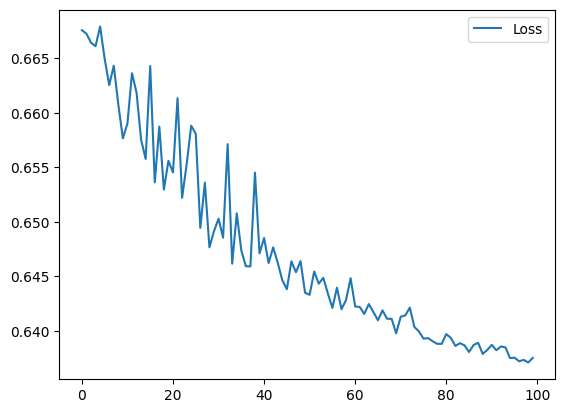

In [17]:
plt.plot(Lerror, label="Loss")
plt.legend()
plt.show()

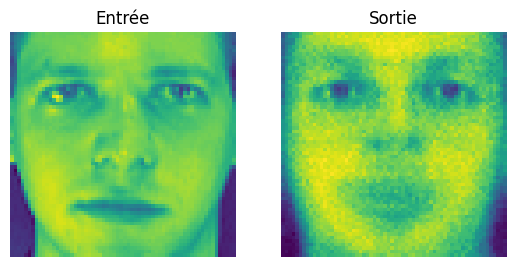

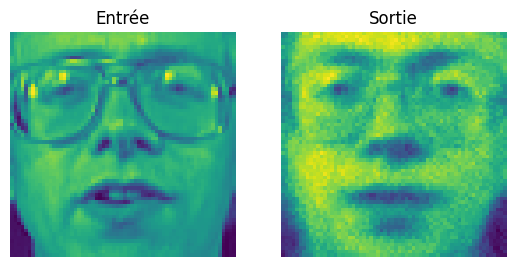

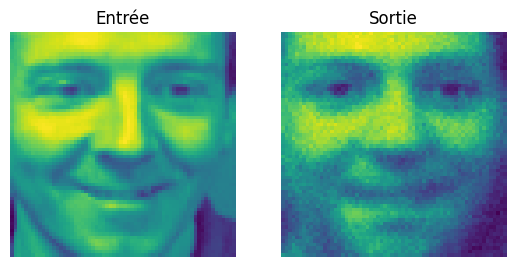

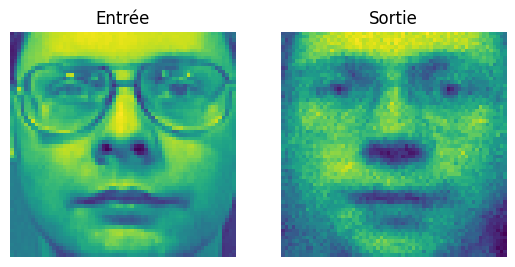

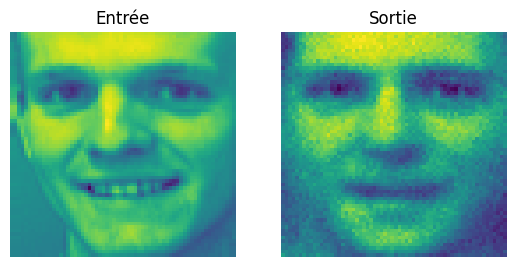

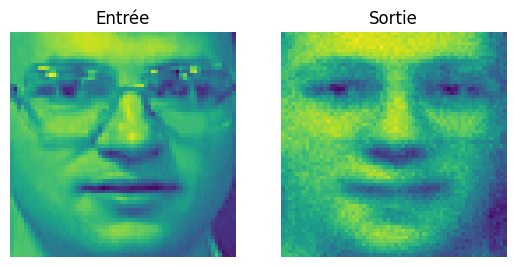

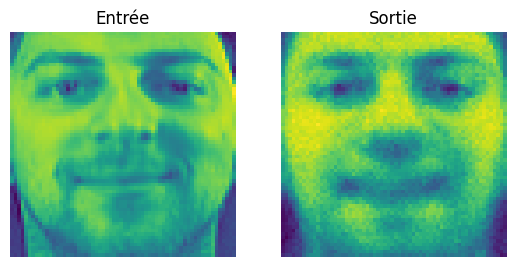

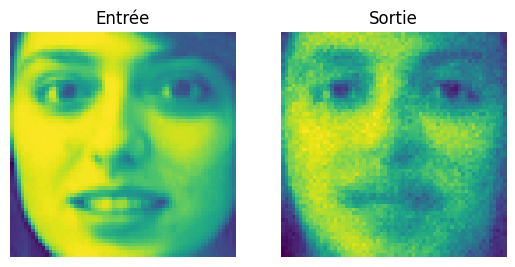

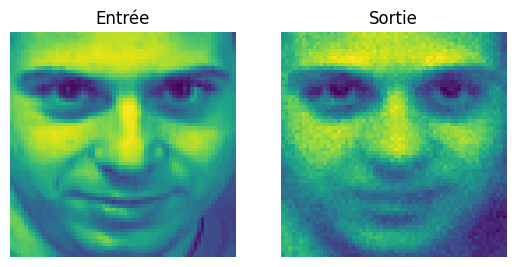

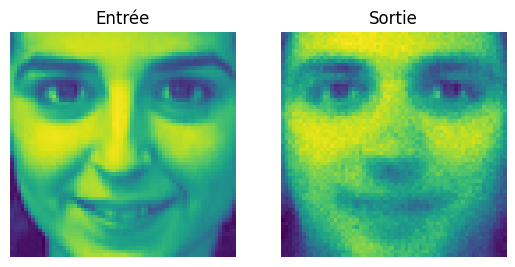

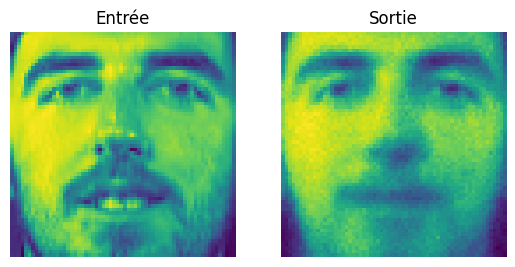

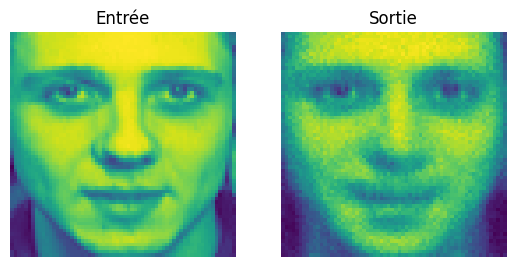

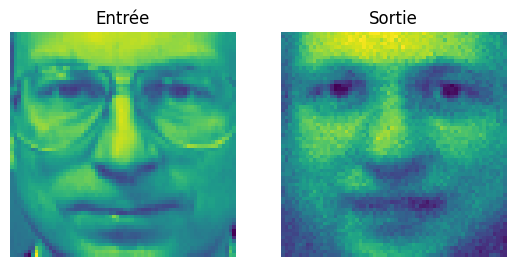

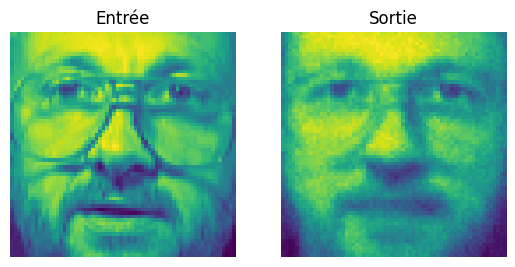

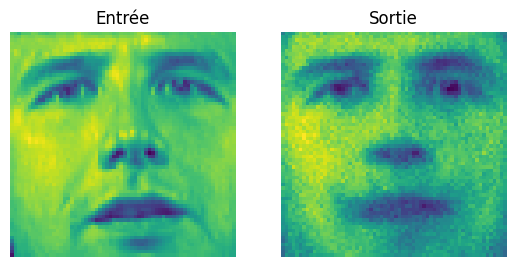

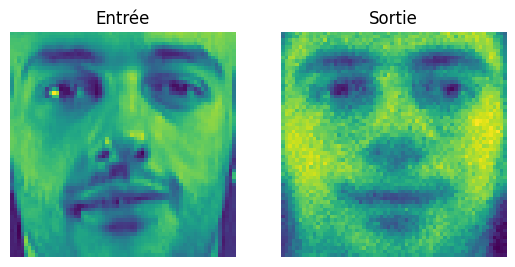

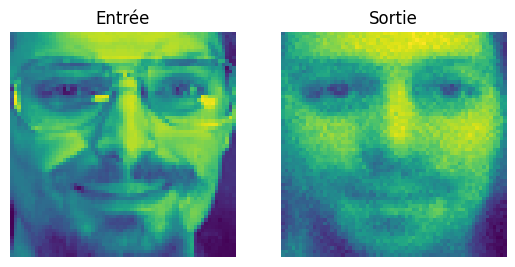

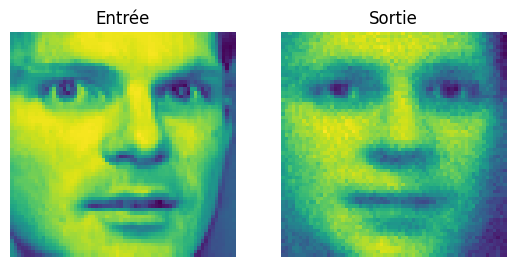

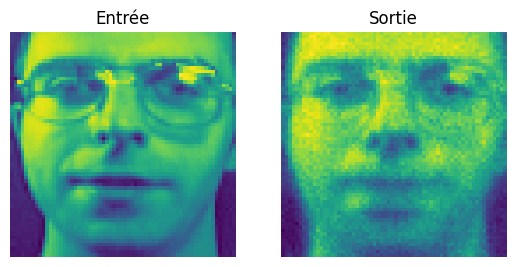

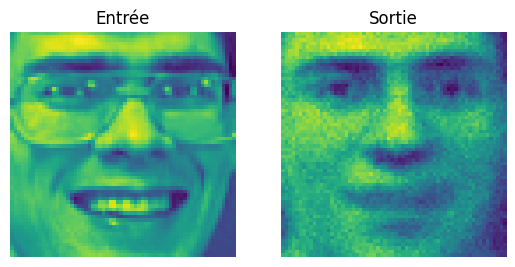

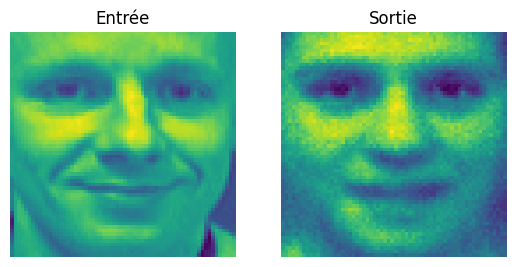

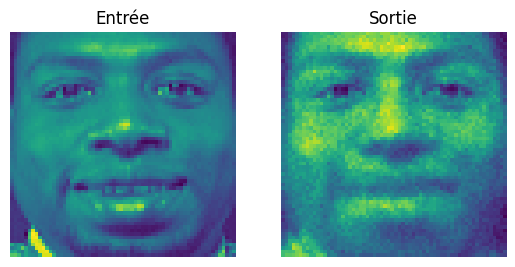

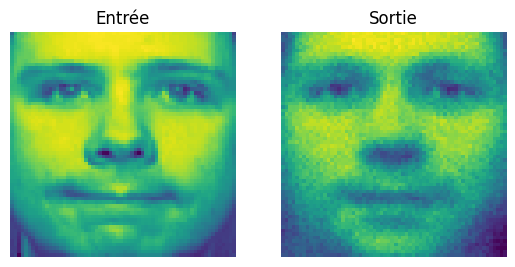

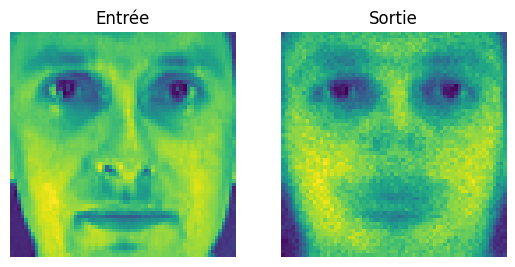

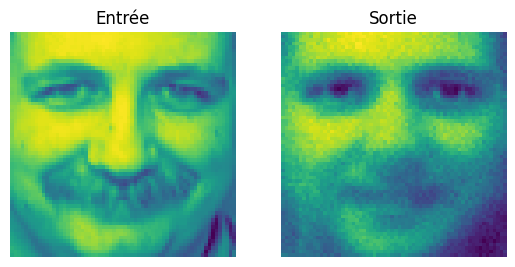

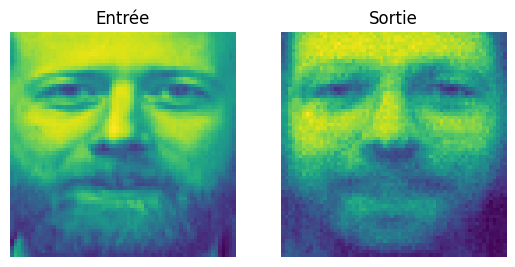

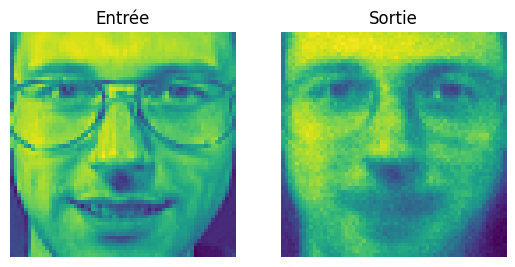

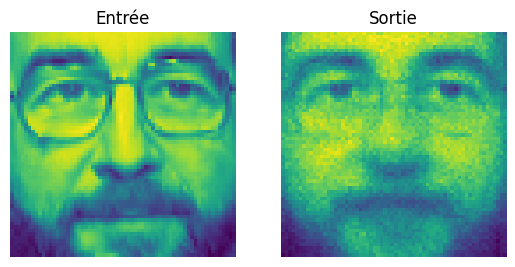

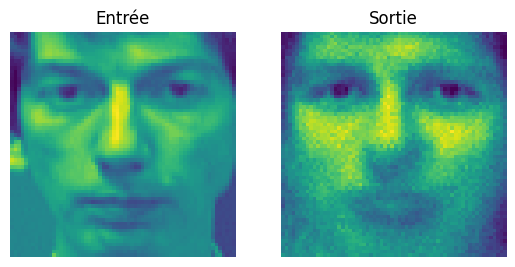

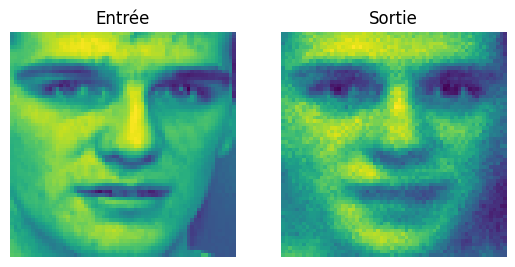

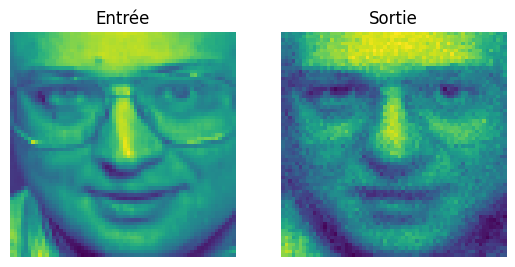

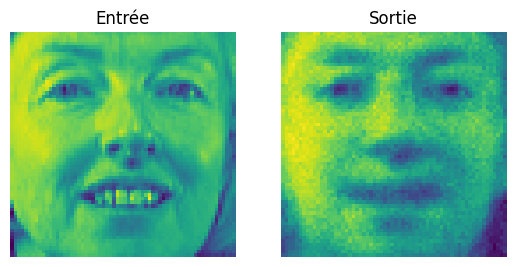

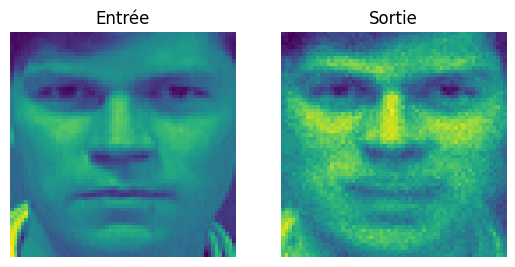

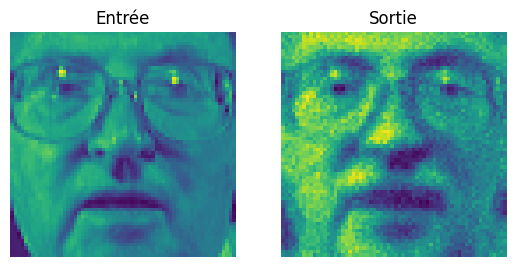

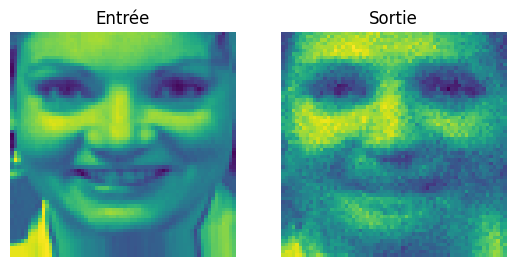

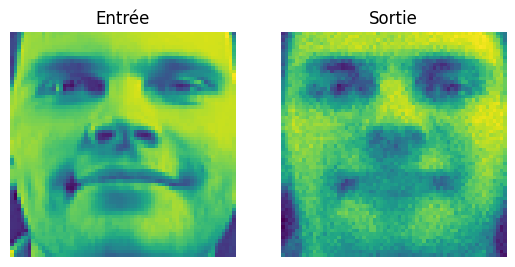

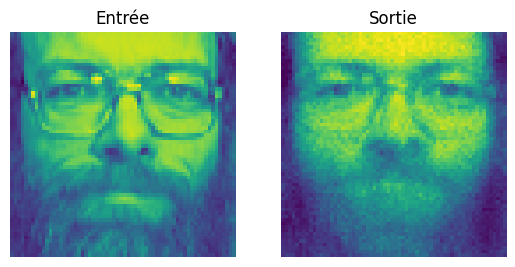

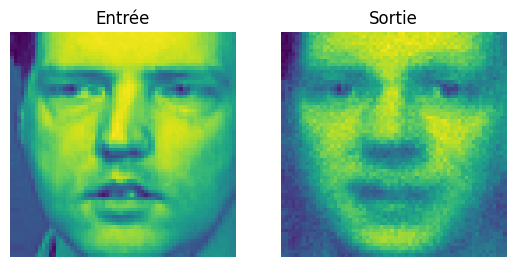

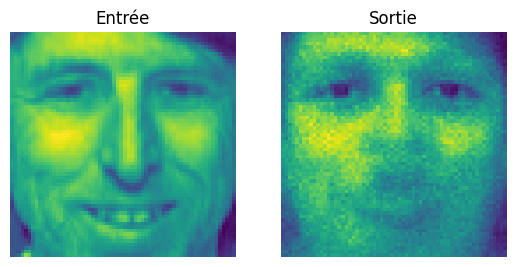

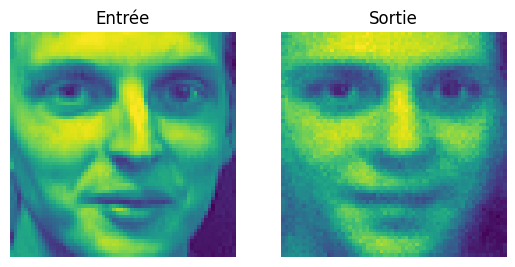

In [18]:
for i in range(40):
    plt.subplot(121)
    plt.title("Entrée")

    entree = np.array(data[label == i,:][0])
    plt.imshow(entree.reshape(64,64))
    plt.axis('off')

    plt.subplot(122)
    plt.title("Sortie")
    out = net.forward(entree.reshape(1,entree.shape[0]))
    plt.imshow(out.reshape(64,64))
    plt.axis('off')
    plt.show()

## parcours full batch

In [9]:
#Encodage = [Linear(4096, 2048), TanH() , Linear(2048, 1024), TanH(), Linear(1024, 512), TanH(), Linear(512, 256), TanH()]
#Decodage = [Linear(256 , 512), TanH() ,Linear(512, 1024) , Linear(1024, 2048), TanH(), Linear(2048, 4096), Sigmoid()]
#bce_loss = BCELoss()
#net = Sequential(Encodage + Decodage)

Encodage = [Linear(4096, 2048), TanH(), Linear(2048, 1024), TanH()]
Decodage = [Linear(1024, 2048), TanH(), Linear(2048, 4096), Sigmoid()]

bce_loss = BCELoss()
net = Sequential(Encodage + Decodage)


loss_list = []

In [12]:
# Boucle d'entraînement en full batc
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    yhat = net.forward(data)

    # Calculer la perte
    loss = bce_loss.forward(data, yhat)
    #if epoch % 10 == 0:
    print("Epoch %d: Loss = %f" % (epoch, np.mean(loss)))

    loss_list.append(loss.mean())

    # Backward pass
    # print(tan.shape)
    # print(delta.shape)
    # print(linear2._gradient.shape)
    delta = bce_loss.backward(data, yhat)
    delta = net.backward(data, delta, gradient_step = 0.001)

Epoch 0: Loss = 0.663064
Epoch 1: Loss = 0.663292
Epoch 2: Loss = 0.662618
Epoch 3: Loss = 0.663084
Epoch 4: Loss = 0.662423
Epoch 5: Loss = 0.663312
Epoch 6: Loss = 0.662306
Epoch 7: Loss = 0.663510
Epoch 8: Loss = 0.662199
Epoch 9: Loss = 0.663733
Epoch 10: Loss = 0.662340
Epoch 11: Loss = 0.664248
Epoch 12: Loss = 0.662216
Epoch 13: Loss = 0.663479
Epoch 14: Loss = 0.662188
Epoch 15: Loss = 0.663115
Epoch 16: Loss = 0.661866
Epoch 17: Loss = 0.662279
Epoch 18: Loss = 0.661722
Epoch 19: Loss = 0.662008
Epoch 20: Loss = 0.662014
Epoch 21: Loss = 0.662170
Epoch 22: Loss = 0.663225
Epoch 23: Loss = 0.662246
Epoch 24: Loss = 0.663855
Epoch 25: Loss = 0.661476
Epoch 26: Loss = 0.662487
Epoch 27: Loss = 0.660945
Epoch 28: Loss = 0.662120
Epoch 29: Loss = 0.660582
Epoch 30: Loss = 0.662262
Epoch 31: Loss = 0.660656
Epoch 32: Loss = 0.663777
Epoch 33: Loss = 0.660357
Epoch 34: Loss = 0.663054
Epoch 35: Loss = 0.660936
Epoch 36: Loss = 0.663629
Epoch 37: Loss = 0.659813
Epoch 38: Loss = 0.660

Epoch 308: Loss = 0.651532
Epoch 309: Loss = 0.649971
Epoch 310: Loss = 0.651450
Epoch 311: Loss = 0.649774
Epoch 312: Loss = 0.651551
Epoch 313: Loss = 0.649691
Epoch 314: Loss = 0.651910
Epoch 315: Loss = 0.650067
Epoch 316: Loss = 0.653258
Epoch 317: Loss = 0.650163
Epoch 318: Loss = 0.652572
Epoch 319: Loss = 0.650390
Epoch 320: Loss = 0.651898
Epoch 321: Loss = 0.650492
Epoch 322: Loss = 0.651391
Epoch 323: Loss = 0.650957
Epoch 324: Loss = 0.651788
Epoch 325: Loss = 0.651377
Epoch 326: Loss = 0.651672
Epoch 327: Loss = 0.650510
Epoch 328: Loss = 0.650694
Epoch 329: Loss = 0.649571
Epoch 330: Loss = 0.650357
Epoch 331: Loss = 0.649569
Epoch 332: Loss = 0.652035
Epoch 333: Loss = 0.650118
Epoch 334: Loss = 0.653673
Epoch 335: Loss = 0.649446
Epoch 336: Loss = 0.650927
Epoch 337: Loss = 0.649530
Epoch 338: Loss = 0.651000
Epoch 339: Loss = 0.649218
Epoch 340: Loss = 0.650082
Epoch 341: Loss = 0.648943
Epoch 342: Loss = 0.649677
Epoch 343: Loss = 0.648857
Epoch 344: Loss = 0.649723
E

Epoch 612: Loss = 0.647596
Epoch 613: Loss = 0.651415
Epoch 614: Loss = 0.645804
Epoch 615: Loss = 0.646466
Epoch 616: Loss = 0.645624
Epoch 617: Loss = 0.647256
Epoch 618: Loss = 0.646032
Epoch 619: Loss = 0.647992
Epoch 620: Loss = 0.646159
Epoch 621: Loss = 0.647442
Epoch 622: Loss = 0.646245
Epoch 623: Loss = 0.646774
Epoch 624: Loss = 0.646238
Epoch 625: Loss = 0.646156
Epoch 626: Loss = 0.645995
Epoch 627: Loss = 0.645861
Epoch 628: Loss = 0.645849
Epoch 629: Loss = 0.646135
Epoch 630: Loss = 0.646166
Epoch 631: Loss = 0.647569
Epoch 632: Loss = 0.647049
Epoch 633: Loss = 0.649821
Epoch 634: Loss = 0.646437
Epoch 635: Loss = 0.648007
Epoch 636: Loss = 0.645764
Epoch 637: Loss = 0.647069
Epoch 638: Loss = 0.645346
Epoch 639: Loss = 0.646358
Epoch 640: Loss = 0.645025
Epoch 641: Loss = 0.645777
Epoch 642: Loss = 0.644773
Epoch 643: Loss = 0.645356
Epoch 644: Loss = 0.644609
Epoch 645: Loss = 0.645135
Epoch 646: Loss = 0.644615
Epoch 647: Loss = 0.645296
Epoch 648: Loss = 0.645017
E

Epoch 916: Loss = 0.643818
Epoch 917: Loss = 0.643382
Epoch 918: Loss = 0.643310
Epoch 919: Loss = 0.643174
Epoch 920: Loss = 0.642951
Epoch 921: Loss = 0.643020
Epoch 922: Loss = 0.643132
Epoch 923: Loss = 0.643438
Epoch 924: Loss = 0.644929
Epoch 925: Loss = 0.645051
Epoch 926: Loss = 0.648371
Epoch 927: Loss = 0.644399
Epoch 928: Loss = 0.645103
Epoch 929: Loss = 0.643863
Epoch 930: Loss = 0.644426
Epoch 931: Loss = 0.643413
Epoch 932: Loss = 0.643793
Epoch 933: Loss = 0.642997
Epoch 934: Loss = 0.643527
Epoch 935: Loss = 0.642875
Epoch 936: Loss = 0.643793
Epoch 937: Loss = 0.642973
Epoch 938: Loss = 0.644166
Epoch 939: Loss = 0.642993
Epoch 940: Loss = 0.643974
Epoch 941: Loss = 0.642892
Epoch 942: Loss = 0.643469
Epoch 943: Loss = 0.642690
Epoch 944: Loss = 0.642996
Epoch 945: Loss = 0.642494
Epoch 946: Loss = 0.642792
Epoch 947: Loss = 0.642521
Epoch 948: Loss = 0.643161
Epoch 949: Loss = 0.643150
Epoch 950: Loss = 0.644662
Epoch 951: Loss = 0.644389
Epoch 952: Loss = 0.646212
E

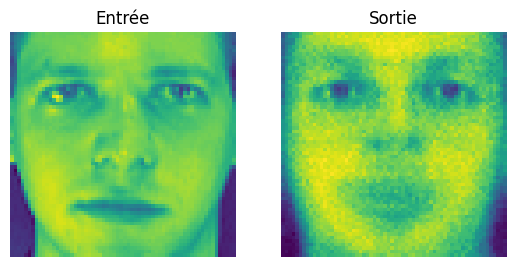

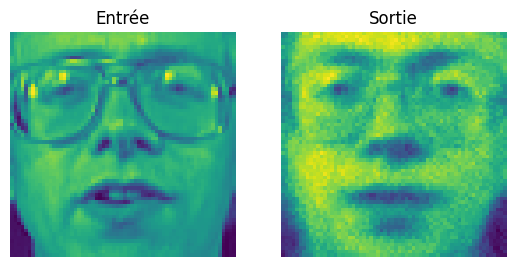

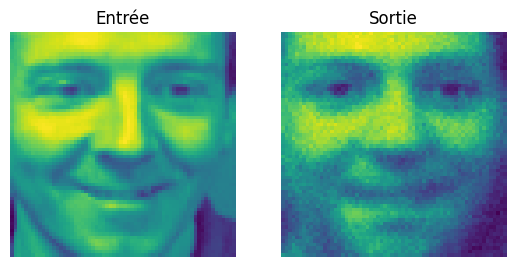

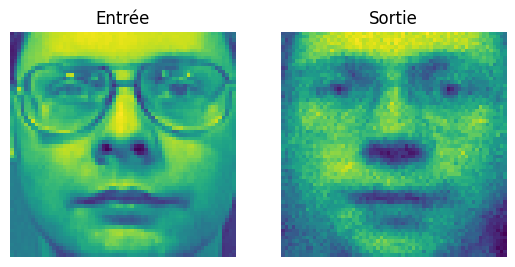

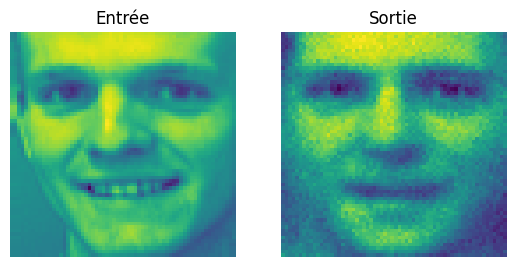

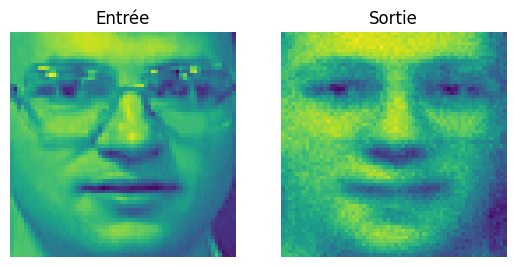

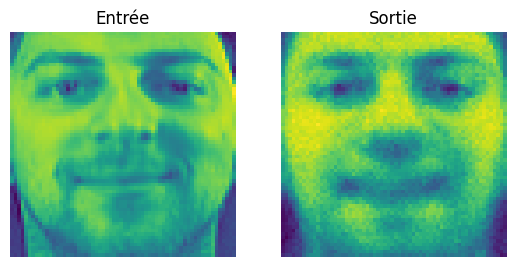

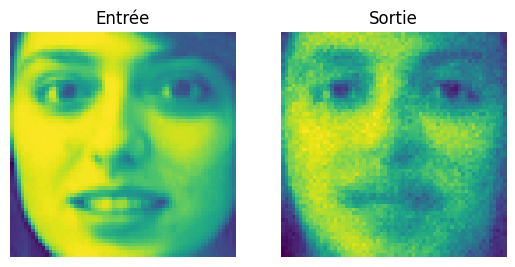

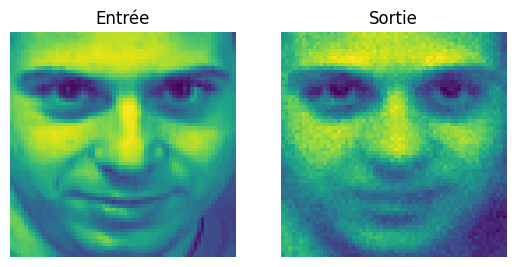

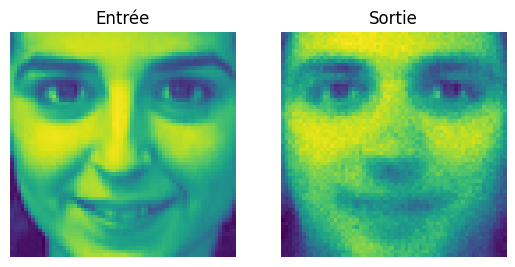

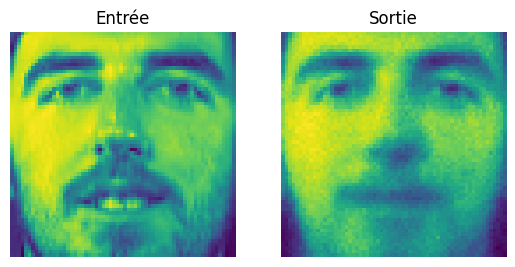

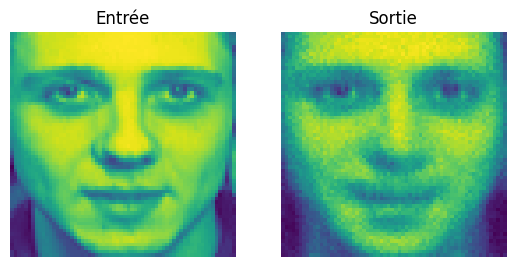

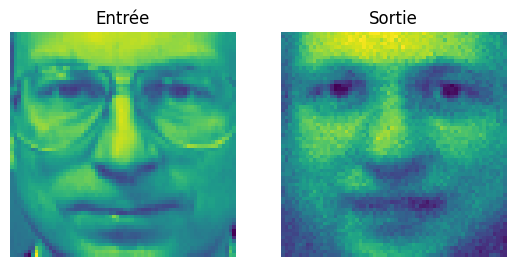

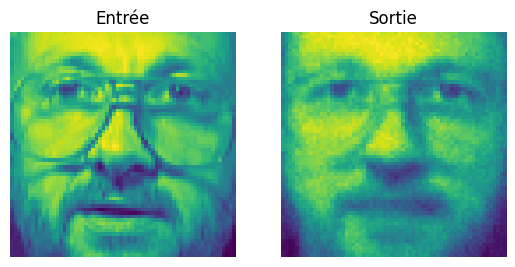

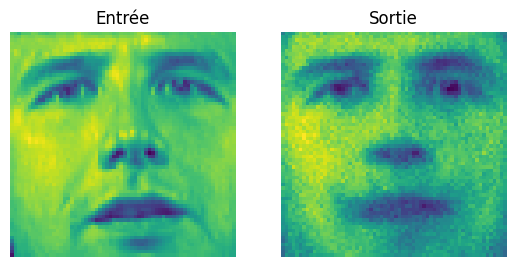

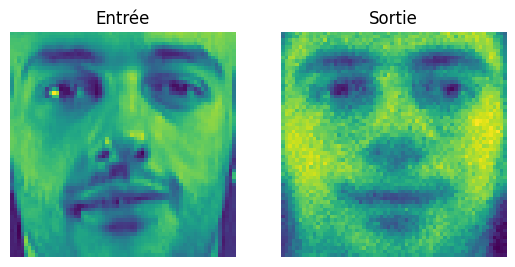

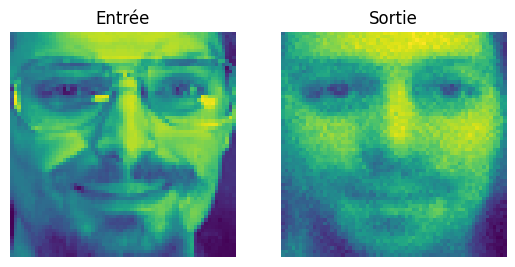

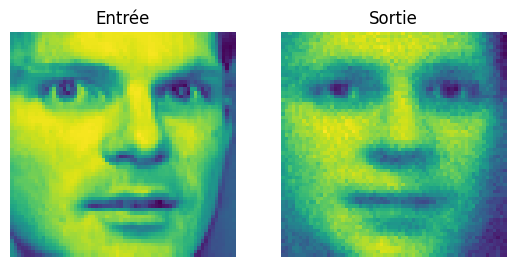

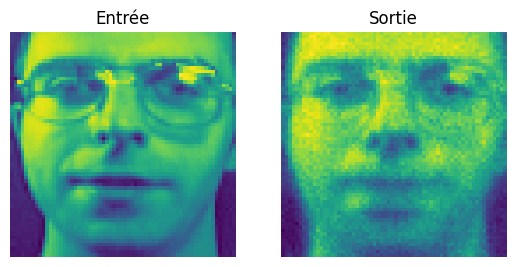

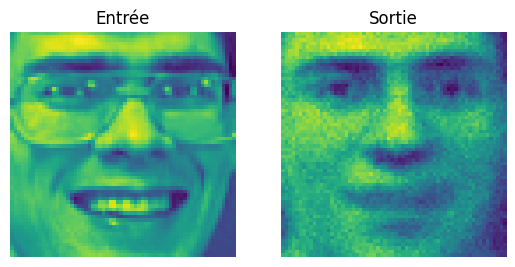

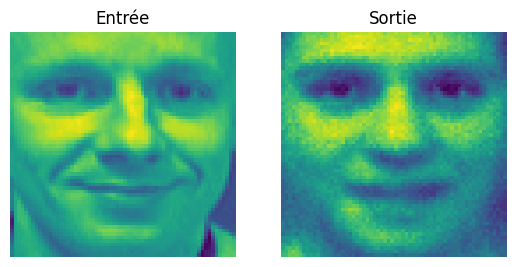

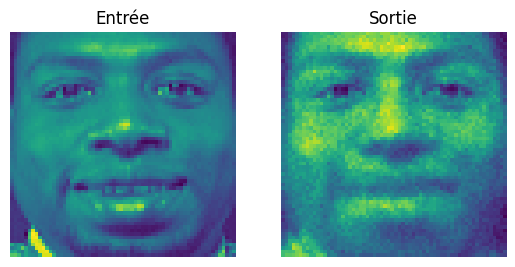

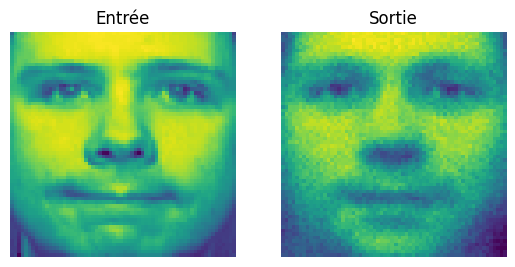

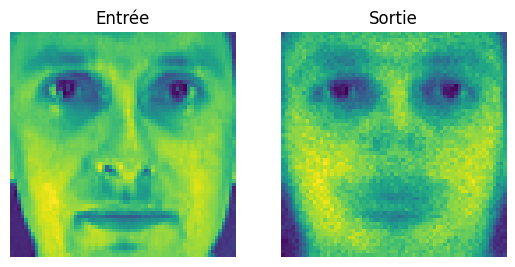

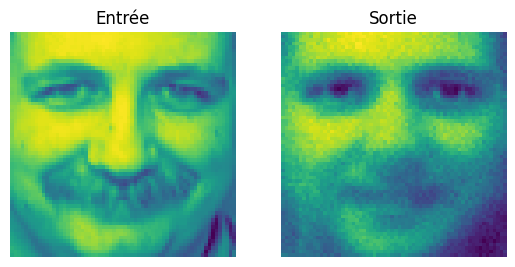

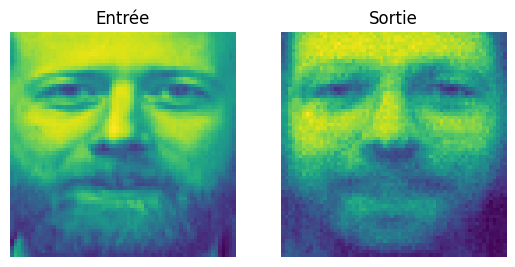

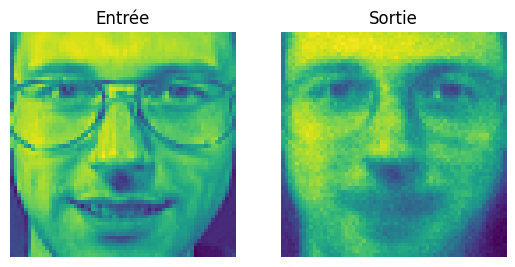

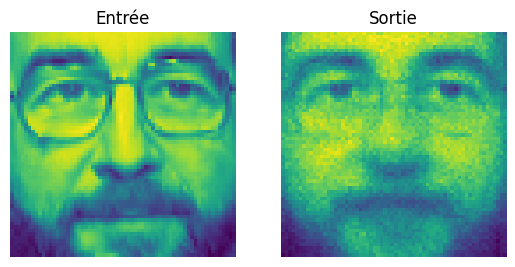

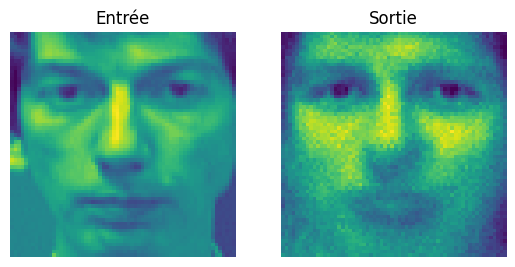

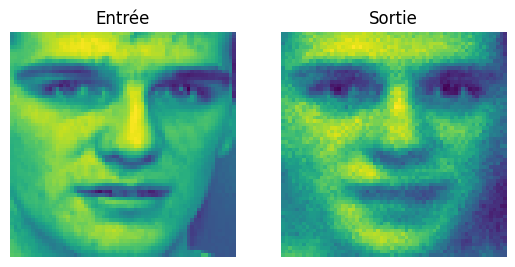

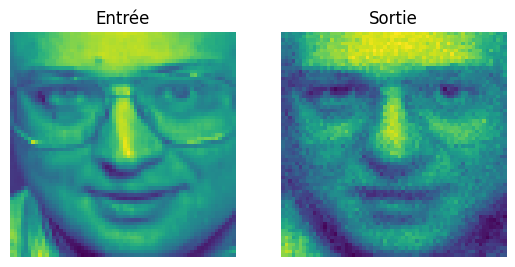

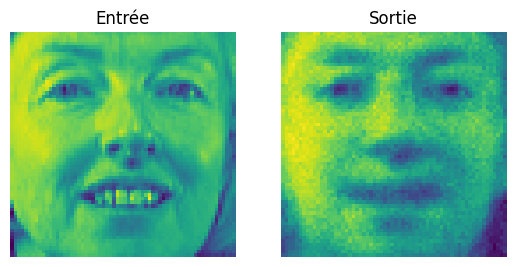

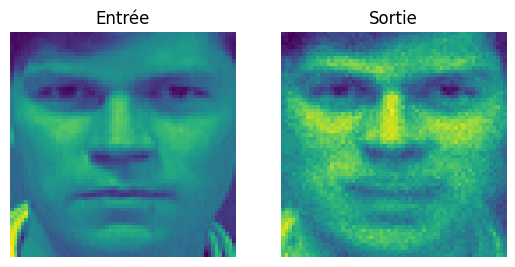

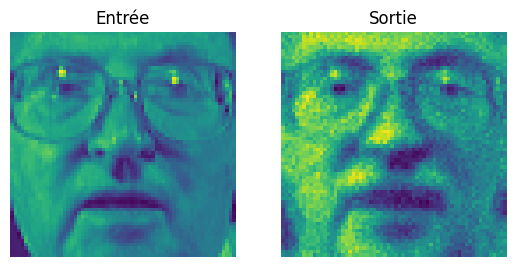

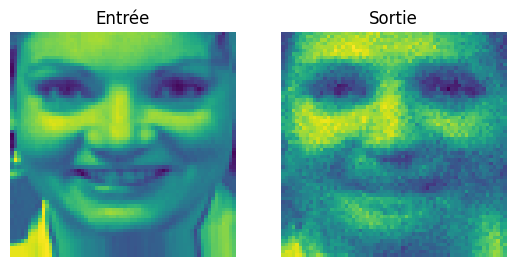

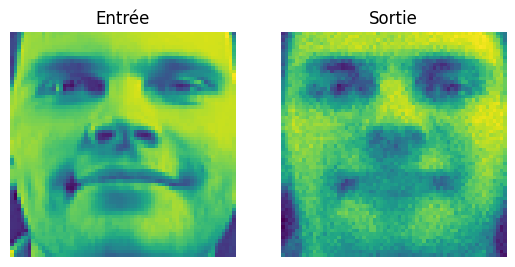

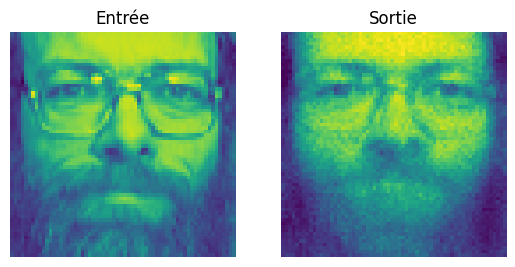

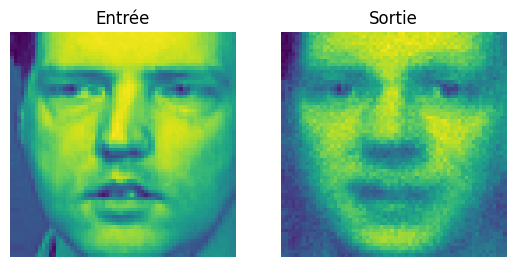

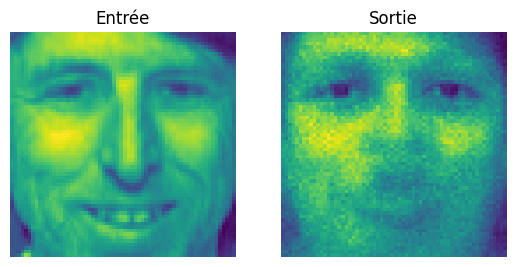

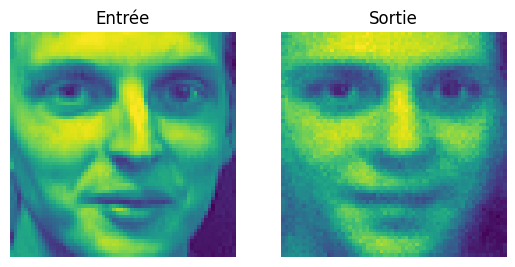

In [16]:
for i in range(40):
    plt.subplot(121)
    plt.title("Entrée")

    entree = np.array(data[label == i,:][0])
    plt.imshow(entree.reshape(64,64))
    plt.axis('off')

    plt.subplot(122)
    plt.title("Sortie")
    out = net.forward(entree.reshape(1,entree.shape[0]))
    plt.imshow(out.reshape(64,64))
    plt.axis('off')
    plt.show()

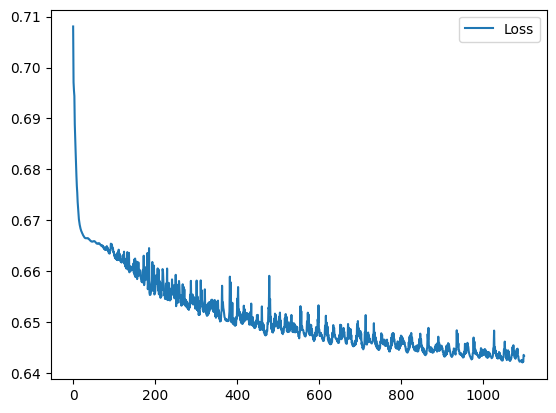

In [15]:
plt.plot(loss_list, label="Loss")
plt.legend()
plt.show()